In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import datetime as dt
from datetime import datetime

In [2]:
data = pd.read_excel("Sales.xlsx")
data = data.copy()
data.head()

,LOGICALREF,COUNT_,TARGET_,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINETOTAL,...,CATEGORY_CODE3,CATEGORY_NAME3,CATEGORY_CODE4,CATEGORY_NAME4,STARTDATE,ENDDATE,CLIENTGENDER,CLIENTBIRTHDATE,BUYINGPRICE,COST
0,1,1,6697.0,8,TOZ SEKER,17258,2017-01-02,2.000,2.65,5.30,...,005.002.4,SEKER TATLANDIRICI,005.002.4.1,TOZ ŞEKER,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,1.987500,3.675
1,2,1,6697.0,20868,KIRMIZI MERCIMEK,17258,2017-01-02,1.006,2.80,2.82,...,004.001.2,AÇIK BAKLİYAT,NaN,NaN,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,2.100000,2.092
2,3,1,6697.0,8583,"TEST MATIK 1,5 KG NORMAL",17258,2017-01-02,1.000,4.95,4.95,...,006.001.6,TOZ DETERJAN,NaN,NaN,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,3.712500,3.143
3,4,1,6697.0,1454,BIZIM MAKARNA BONCUK,17258,2017-01-02,1.000,1.10,1.10,...,004.002.1,MAKARNA,NaN,NaN,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,0.825000,0.765
4,5,1,6697.0,13519,FILIZ MAKARNA KISA KESME 500 GR,17258,2017-01-02,1.000,1.10,1.10,...,004.002.1,MAKARNA,NaN,NaN,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,0.836111,0.775


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602983 entries, 0 to 602982
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   LOGICALREF       602983 non-null  int64         
 1   COUNT_           602983 non-null  int64         
 2   TARGET_          380132 non-null  float64       
 3   ITEMCODE         602983 non-null  int64         
 4   ITEMNAME         602983 non-null  object        
 5   FICHENO          602983 non-null  int64         
 6   DATE_            602983 non-null  datetime64[ns]
 7   AMOUNT           602983 non-null  float64       
 8   PRICE            602983 non-null  float64       
 9   LINETOTAL        602983 non-null  float64       
 10  LINENET          602983 non-null  float64       
 11  BRANCHNR         602983 non-null  int64         
 12  BRANCH           602983 non-null  object        
 13  SALESMAN         602983 non-null  object        
 14  CITY             602

In [4]:
data.isna().sum()

LOGICALREF              0
COUNT_                  0
TARGET_            222851
ITEMCODE                0
ITEMNAME                0
FICHENO                 0
DATE_                   0
AMOUNT                  0
PRICE                   0
LINETOTAL               0
LINENET                 0
BRANCHNR                0
BRANCH                  0
SALESMAN                0
CITY                    0
REGION                  0
LATITUDE                0
LONGITUDE               0
CLIENTNAME              0
BRANDCODE           28388
BRAND               28388
CATEGORY                0
CATEGORYCODE            0
CATEGORY_CODE1          0
CATEGORY_NAME1          0
CATEGORY_CODE2      20491
CATEGORY_NAME2      20491
CATEGORY_CODE3     202288
CATEGORY_NAME3     202288
CATEGORY_CODE4     566879
CATEGORY_NAME4     566879
STARTDATE               0
ENDDATE                 0
CLIENTGENDER            0
CLIENTBIRTHDATE         0
BUYINGPRICE             0
COST                    0
dtype: int64

#### Top Selling Cashiers

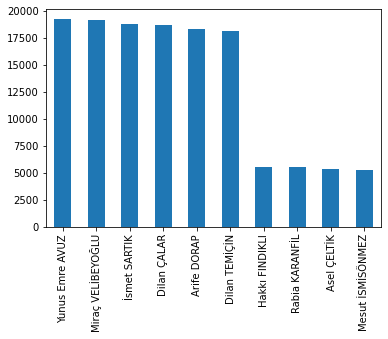

In [5]:
people = data.SALESMAN.value_counts()
people2 = people.head(10)
if len(people) < 10:
    people2['remaining {0} items'.format(len(people) - 10)] = sum(people[10:])
people2.plot(kind='bar')

#### Top selling days of the week

In [6]:
date = data["DATE_"].dt.dayofweek
date.head()

0    0
1    0
2    0
3    0
4    0
Name: DATE_, dtype: int64

In [7]:
line_sum = data["LINENET"].sum()
line_sum

2239195.5500000003

In [8]:
data["Day_Of_Week"] = date

In [9]:
data.groupby(["LINENET" , "Day_Of_Week"]).sum()

LOGICALREF  COUNT_   TARGET_  ITEMCODE  FICHENO   AMOUNT  \
LINENET Day_Of_Week                                                             
0.01    1                423019       5   38287.0     42316   186830    0.012   
        2               1084001       6  386244.0     64784   357384    0.010   
        3                 22521       3  218222.0     16086    57943    0.008   
        5               2080491       6  164582.0     33500   590888    0.014   
        6               1041345       2       0.0      7772   277454    0.002   
...                         ...     ...       ...       ...      ...      ...   
347.22  3                 95877       2   43036.0     10724    57704    2.000   
388.89  6                569665       1       0.0         8   150423  150.000   
402.87  3                147990       1   21518.0     21590    52515   13.225   
444.06  5                305551       1   23600.0      3198    89026   15.000   
490.74  5                211483       1   15876.0         8    67069  200.000   

                      PRICE  LINETOTAL  BRANCHNR  LATITUDE  LONGITUDE  \
LINENET Day_Of_Week                                                     
0.01    1             20.40       0.05       127  194.3348   160.6951   
        2             34.60       0.06       214  236.9772   227.9606   
        3             13.20       0.03       134  118.4677    99.9344   
        5             24.00       0.06       154  232.8422   202.8362   
        6             13.90       0.02       156   76.9782    86.8178   
...                     ...        ...       ...       ...        ...   
347.22  3            750.00     750.00        52   75.8288    80.4612   
388.89  6              2.80     420.00        81   41.4564    31.7987   
402.87  3             32.90     435.10        26   37.9144    40.2306   
444.06  5             29.90     448.50        81   41.4564    31.7987   
490.74  5              2.65     530.00        67   41.2928    36.3313   

                     CATEGORY_CODE1  BUYINGPRICE     COST  
LINENET Day_Of_Week                                        
0.01    1                        20    18.135997    0.043  
        2                        24    28.785997    0.052  
        3                        12    12.026998    0.027  
        5                        12    20.456706    0.052  
        6                         4    10.286321    0.014  
...                             ...          ...      ...  
347.22  3                         8     8.017998    7.424  
388.89  6                         5     2.056085  285.568  
402.87  3                         2    24.675000  302.153  
444.06  5                         4    22.425000  333.045  
490.74  5                         5     1.991724  368.837  

[17099 rows x 14 columns]

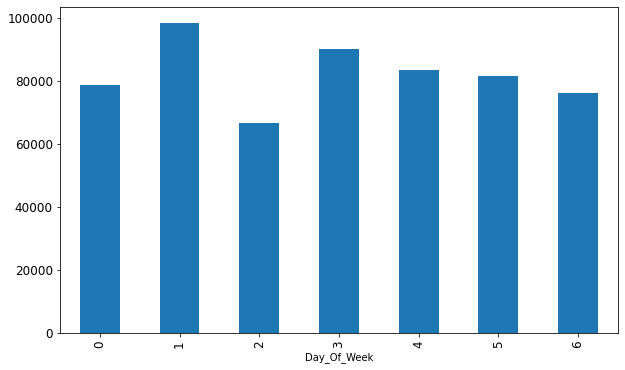

In [10]:
data.groupby(["Day_Of_Week"])["BRAND"].count().plot.bar(figsize=(10,6) , fontsize=12)

#### What city had the highest number of sales?

In [11]:
results = data.groupby("CITY").sum()
results

,LOGICALREF,COUNT_,TARGET_,ITEMCODE,FICHENO,AMOUNT,PRICE,LINETOTAL,LINENET,BRANCHNR,LATITUDE,LONGITUDE,CATEGORY_CODE1,BUYINGPRICE,COST,Day_Of_Week
CITY,,,,,,,,,,,,,,,,
Adana,4936542762,15668,2.479689e+08,142611825,1428032794,20334.882,63438.29,64517.44,59454.29,15668,5.797160e+05,5.534141e+05,66578,47502.617775,44551.878,45801
Adıyaman,1384559060,4499,2.020478e+07,40638135,402332541,5792.879,17789.50,18056.11,16623.68,8998,1.699038e+05,1.722154e+05,19075,13358.580803,12494.372,13265
Afyonkarahisar,1520993848,5031,2.639242e+07,45214933,443647285,6310.942,19578.21,19485.63,17902.79,15093,1.949548e+05,1.537308e+05,21414,14701.957974,13458.176,14229
Aksaray,982718911,3131,9.076935e+06,29425444,284423001,3745.925,12112.21,12280.00,11313.23,15655,1.201324e+05,1.065698e+05,13475,9086.308748,8493.744,9292
Amasya,789382413,2676,7.452120e+06,24073082,231518071,3525.318,10697.99,11140.40,10285.89,16056,1.087791e+05,9.589526e+04,11832,8009.372203,7706.648,7814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çorum,1307999945,4165,1.561100e+07,36749468,378578920,5329.781,16153.80,16465.52,15182.42,99960,1.688932e+05,1.455901e+05,17458,12097.483435,11373.735,12155
İstanbul,34391553794,112181,1.307669e+10,1009822807,10002425603,142053.416,442922.99,450552.18,415009.28,4487240,4.600016e+06,3.250669e+06,478594,332186.617898,311401.725,331433
İzmir,9867588219,31894,1.022883e+09,284487062,2864500766,40390.475,128211.80,130616.40,120265.55,1307654,1.225332e+06,8.652428e+05,137989,96243.886170,90249.056,94209


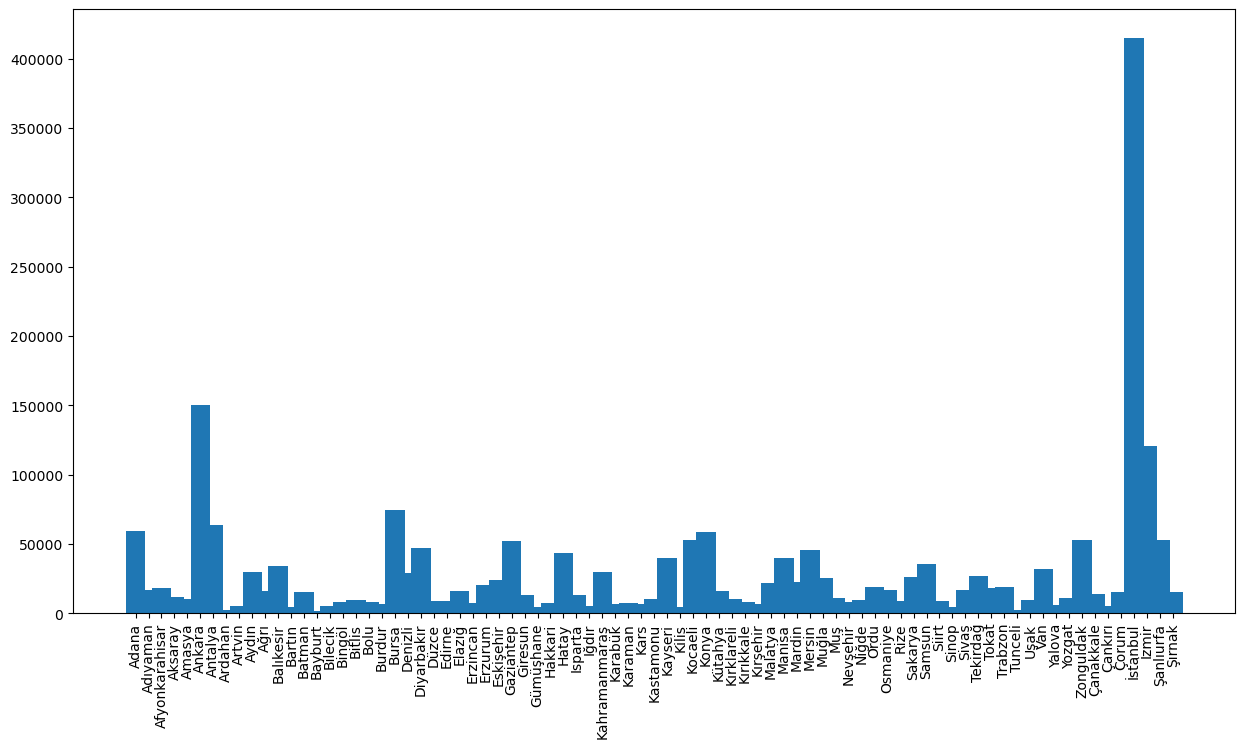

<Figure size 1500x800 with 0 Axes>

In [69]:
cities = [city for city , df in data.groupby('CITY')]

plt.bar(cities , results["LINENET"] , width=1.5)
plt.xticks(cities , rotation = 'vertical')
fig=plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [13]:
data['Order Date'] = pd.to_datetime(data['STARTDATE'])

In [14]:
data["Hour"] = data['Order Date'].dt.hour
data["Minute"] = data['Order Date'].dt.minute

In [15]:
data.head()

,LOGICALREF,COUNT_,TARGET_,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINETOTAL,...,STARTDATE,ENDDATE,CLIENTGENDER,CLIENTBIRTHDATE,BUYINGPRICE,COST,Day_Of_Week,Order Date,Hour,Minute
0,1,1,6697.0,8,TOZ SEKER,17258,2017-01-02,2.000,2.65,5.30,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,1.987500,3.675,0,2017-01-03 09:25:03,9,25
1,2,1,6697.0,20868,KIRMIZI MERCIMEK,17258,2017-01-02,1.006,2.80,2.82,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,2.100000,2.092,0,2017-01-03 09:25:03,9,25
2,3,1,6697.0,8583,"TEST MATIK 1,5 KG NORMAL",17258,2017-01-02,1.000,4.95,4.95,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,3.712500,3.143,0,2017-01-03 09:25:03,9,25
3,4,1,6697.0,1454,BIZIM MAKARNA BONCUK,17258,2017-01-02,1.000,1.10,1.10,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,0.825000,0.765,0,2017-01-03 09:25:03,9,25
4,5,1,6697.0,13519,FILIZ MAKARNA KISA KESME 500 GR,17258,2017-01-02,1.000,1.10,1.10,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,0.836111,0.775,0,2017-01-03 09:25:03,9,25


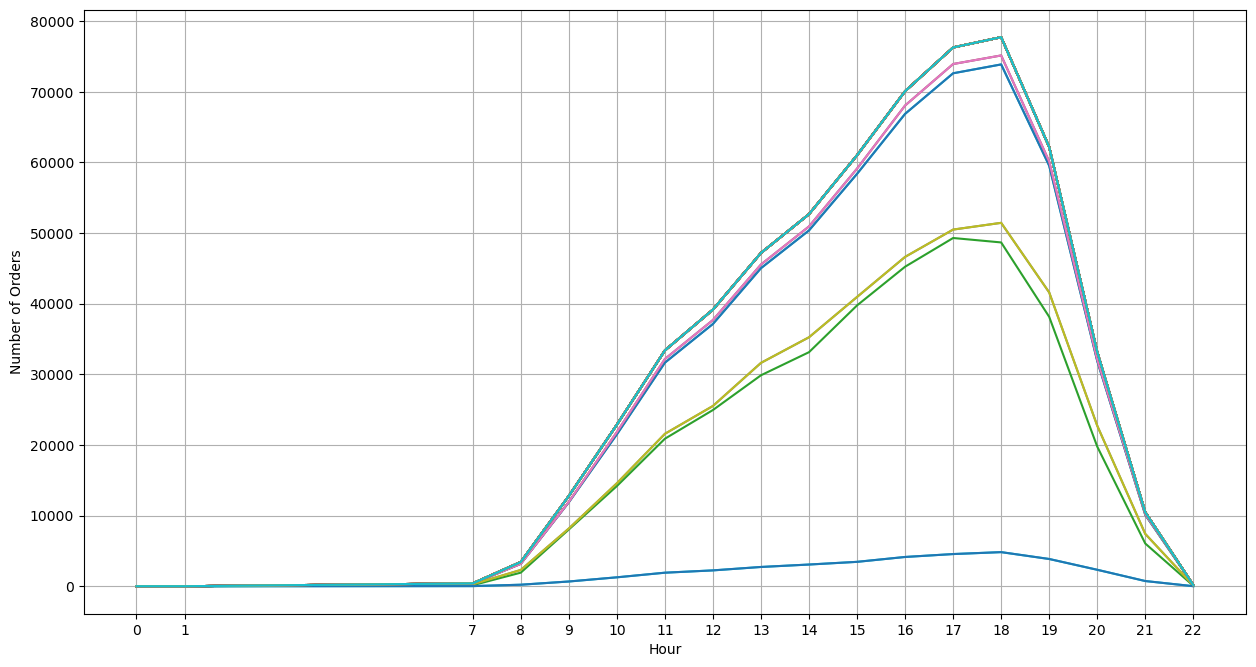

In [16]:
hours = [hour for hour , df in data.groupby('Hour')]

plt.plot(hours , data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

#### What product sold the most ?

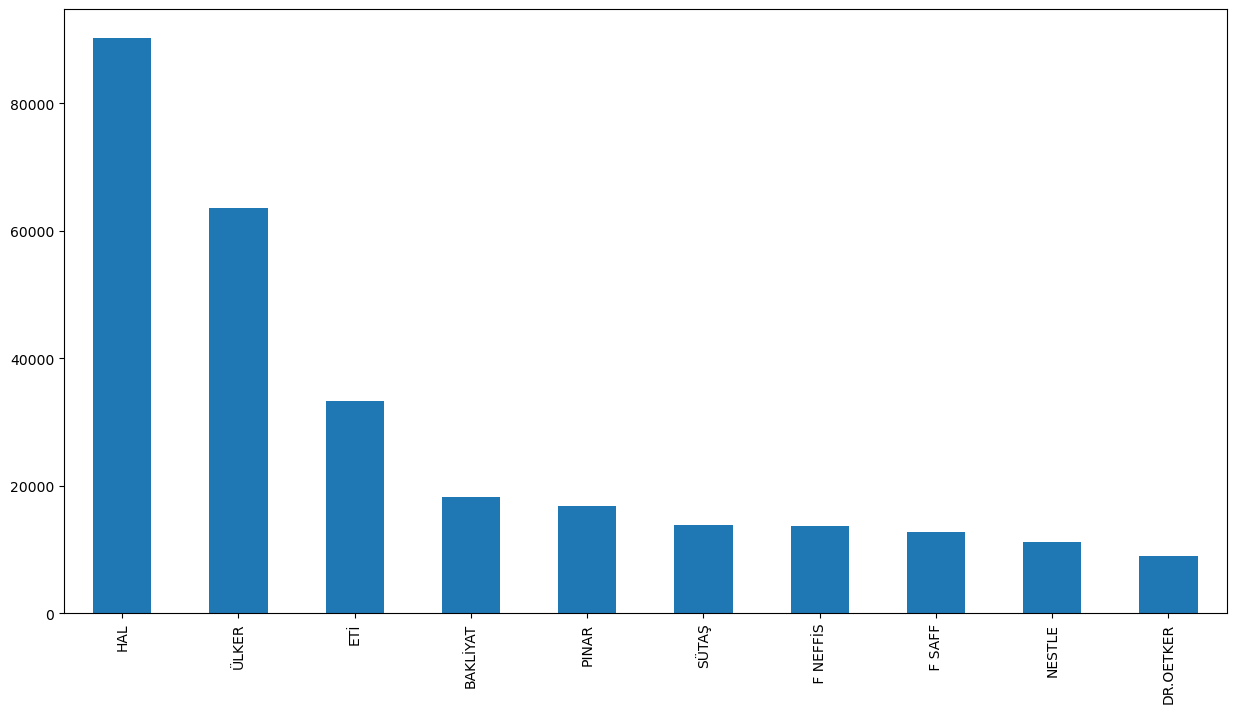

In [17]:
brand = data.BRAND.value_counts()
brand2 = brand.head(10)
if len(brand) < 10:
    brand2['remaining {0} items'.format(len(brand) - 10)] = sum(brand[10:])
brand2.plot(kind='bar')

#### Which city had the most sales?

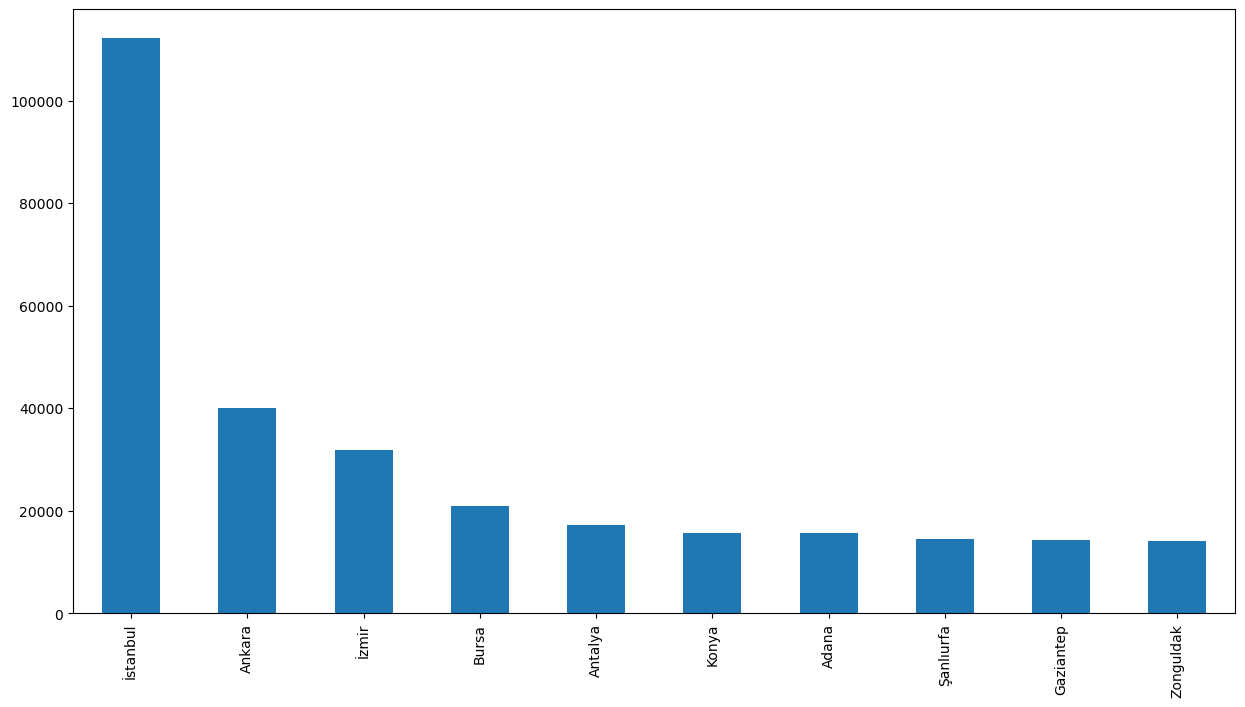

In [18]:
city = data.CITY.value_counts()
city2 = city.head(10)
if len(city) < 10:
    city2['remaining {0} items'.format(len(city) - 10)] = sum(city[10:])
city2.plot(kind='bar')

In [19]:
df = pd.read_excel("Sales_Target.xlsx")
df = df.copy()
df.head()

,LOGICALREF,REGION,BRANCH,CITY,MONTH_,DATE_,CATEGORY_NAME1,LINENET,TARGET_
0,1,Akdeniz,Adana Subesi,Adana,1,2017-01-03,ET TAVUK,1964.62,1021.188018
1,2,Akdeniz,Adana Subesi,Adana,1,2017-01-03,KOZMETİK,717.79,905.967920
2,3,Akdeniz,Antalya Subesi,Antalya,1,2017-01-02,SİGARA,1289.06,1596.313124
3,4,Akdeniz,Burdur Subesi,Burdur,1,2017-01-02,GIDA,620.87,870.216762
4,5,Akdeniz,Burdur Subesi,Burdur,1,2017-01-02,İÇECEK,234.34,240.446707


In [20]:
df.groupby("REGION").count()

,LOGICALREF,BRANCH,CITY,MONTH_,DATE_,CATEGORY_NAME1,LINENET,TARGET_
REGION,,,,,,,,
Akdeniz,267,267,267,267,267,267,267,267
Doğu Anadolu,462,462,462,462,462,462,462,462
Ege,300,300,300,300,300,300,300,300
Güneydoğu Anadolu,300,300,300,300,300,300,300,300
Karadeniz,593,593,593,593,593,593,593,593
Marmara,333,333,333,333,333,333,333,333
İç Anadolu,431,431,431,431,431,431,431,431


In [21]:
df.groupby("REGION").sum()

,LOGICALREF,MONTH_,LINENET,TARGET_
REGION,,,,
Akdeniz,261486,535,278477.54,287596.226022
Doğu Anadolu,500075,924,165364.36,170735.431353
Ege,354139,598,321318.70,320997.808287
Güneydoğu Anadolu,386254,600,234526.31,226597.326747
Karadeniz,924759,1186,245717.14,253777.981956
Marmara,580041,666,638491.63,609227.069373
İç Anadolu,601887,863,355299.87,351034.234168


In [22]:
df.groupby(["REGION" , "CATEGORY_NAME1"]).sum()

LOGICALREF  MONTH_   LINENET       TARGET_
REGION     CATEGORY_NAME1                                               
Akdeniz    BEBEK                   24492      48   8043.99   8665.791893
           DETERJAN TEMİZLİK       23159      48  15024.78  17309.347018
           ET TAVUK                23817      48  26837.78  30379.354339
           EV                      24506      48   4501.78   4540.290555
           GIDA                    24067      48  73517.80  72423.744112
...                                  ...     ...       ...           ...
İç Anadolu MEYVE SEBZE             54609      78  36517.56  32094.668722
           PET                      3165       5     27.02     21.025239
           SÜT KAHVALTILIK         54401      78  66509.10  66454.005934
           SİGARA                  53195      78  24133.21  24472.704636
           İÇECEK                  54544      78  38031.23  36897.744978

[84 rows x 4 columns]

#### Distribution Of Categories

<ipython-input-23-60f27d188c90>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


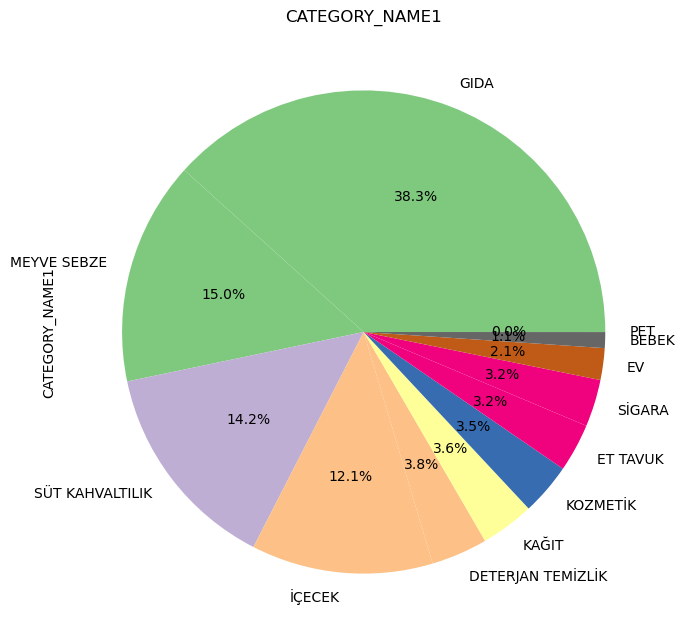

In [23]:
data['CATEGORY_NAME1'].value_counts().plot.pie(title='CATEGORY_NAME1',cmap="Accent",autopct="%1.1f%%")
plt.subplot()

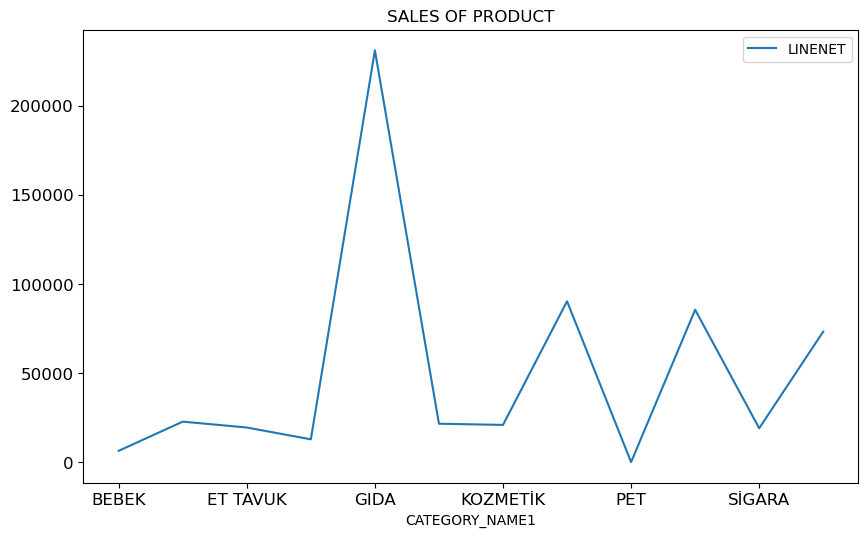

In [24]:
data[["CATEGORY_NAME1",'LINENET']].groupby('CATEGORY_NAME1')\
.count().plot(figsize=(10,6), fontsize=12, title='SALES OF PRODUCT')

#### Target and Sales Chart

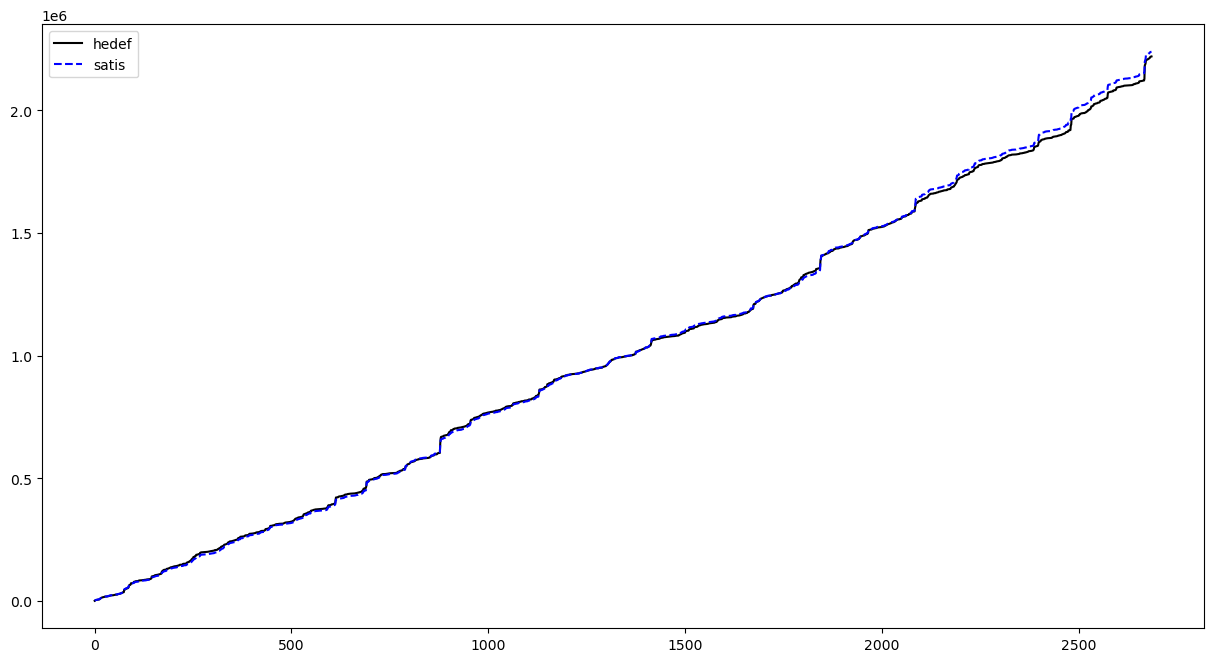

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
veri1 = df["TARGET_"].cumsum()
veri2 = df["LINENET"].cumsum()
ax.plot(veri1 , "k" , label="hedef")
ax.plot(veri2 , "b--" , label="satis")
ax.legend(loc="best")

### Modelleme

In [26]:
data.head(2)

,LOGICALREF,COUNT_,TARGET_,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINETOTAL,...,STARTDATE,ENDDATE,CLIENTGENDER,CLIENTBIRTHDATE,BUYINGPRICE,COST,Day_Of_Week,Order Date,Hour,Minute
0,1,1,6697.0,8,TOZ SEKER,17258,2017-01-02,2.000,2.65,5.30,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,1.9875,3.675,0,2017-01-03 09:25:03,9,25
1,2,1,6697.0,20868,KIRMIZI MERCIMEK,17258,2017-01-02,1.006,2.80,2.82,...,2017-01-03 09:25:03,2017-01-03 09:25:43,K,1973-06-21,2.1000,2.092,0,2017-01-03 09:25:03,9,25


In [27]:
data.columns

Index(['LOGICALREF', 'COUNT_', 'TARGET_', 'ITEMCODE', 'ITEMNAME', 'FICHENO',
       'DATE_', 'AMOUNT', 'PRICE', 'LINETOTAL', 'LINENET', 'BRANCHNR',
       'BRANCH', 'SALESMAN', 'CITY', 'REGION', 'LATITUDE', 'LONGITUDE',
       'CLIENTNAME', 'BRANDCODE', 'BRAND', 'CATEGORY', 'CATEGORYCODE',
       'CATEGORY_CODE1', 'CATEGORY_NAME1', 'CATEGORY_CODE2', 'CATEGORY_NAME2',
       'CATEGORY_CODE3', 'CATEGORY_NAME3', 'CATEGORY_CODE4', 'CATEGORY_NAME4',
       'STARTDATE', 'ENDDATE', 'CLIENTGENDER', 'CLIENTBIRTHDATE',
       'BUYINGPRICE', 'COST', 'Day_Of_Week', 'Order Date', 'Hour', 'Minute'],
      dtype='object')

In [28]:
df.head(2)

,LOGICALREF,REGION,BRANCH,CITY,MONTH_,DATE_,CATEGORY_NAME1,LINENET,TARGET_
0,1,Akdeniz,Adana Subesi,Adana,1,2017-01-03,ET TAVUK,1964.62,1021.188018
1,2,Akdeniz,Adana Subesi,Adana,1,2017-01-03,KOZMETİK,717.79,905.967920


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
object_data = df.select_dtypes(include = ["object"]).copy()
object_data

,REGION,BRANCH,CITY,CATEGORY_NAME1
0,Akdeniz,Adana Subesi,Adana,ET TAVUK
1,Akdeniz,Adana Subesi,Adana,KOZMETİK
2,Akdeniz,Antalya Subesi,Antalya,SİGARA
3,Akdeniz,Burdur Subesi,Burdur,GIDA
4,Akdeniz,Burdur Subesi,Burdur,İÇECEK
...,...,...,...,...
2681,Marmara,Tekirdağ Subesi,Tekirdağ,ET TAVUK
2682,Marmara,Tekirdağ Subesi,Tekirdağ,GIDA
2683,Marmara,Tekirdağ Subesi,Tekirdağ,KOZMETİK
2684,Marmara,Yalova Subesi,Yalova,DETERJAN TEMİZLİK


In [32]:
object_data["REGION"] = le.fit_transform(object_data["REGION"])
object_data["BRANCH"] = le.fit_transform(object_data["BRANCH"])
object_data["CITY"] = le.fit_transform(object_data["CITY"])
object_data["CATEGORY_NAME1"] = le.fit_transform(object_data["CATEGORY_NAME1"])

In [33]:
df["REGION"] = object_data["REGION"]
df["BRANCH"] = object_data["BRANCH"]
df["CITY"] = object_data["CITY"]
df["CATEGORY_NAME1"] = object_data["CATEGORY_NAME1"]

In [34]:
df.head()

,LOGICALREF,REGION,BRANCH,CITY,MONTH_,DATE_,CATEGORY_NAME1,LINENET,TARGET_
0,1,0,0,0,1,2017-01-03,2,1964.62,1021.188018
1,2,0,0,0,1,2017-01-03,6,717.79,905.967920
2,3,0,6,6,1,2017-01-02,10,1289.06,1596.313124
3,4,0,19,19,1,2017-01-02,4,620.87,870.216762
4,5,0,19,19,1,2017-01-02,11,234.34,240.446707


### Heatmap

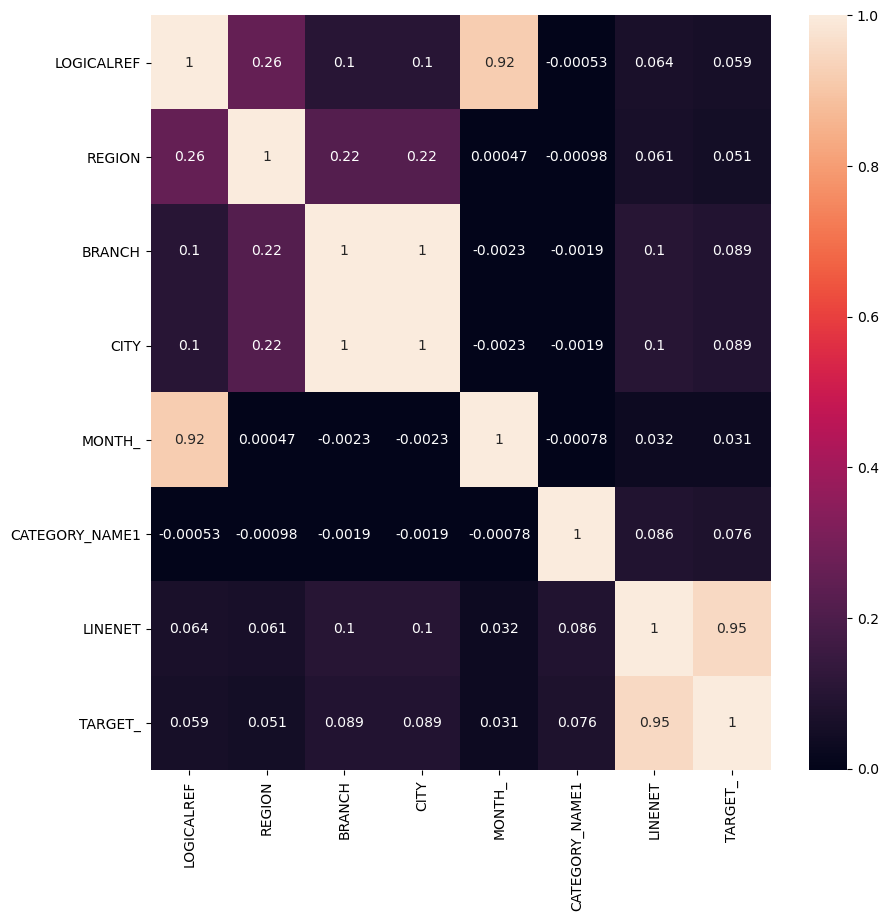

In [35]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [36]:
df2 = df.drop("DATE_" , axis=1)

In [37]:
df2.head()

,LOGICALREF,REGION,BRANCH,CITY,MONTH_,CATEGORY_NAME1,LINENET,TARGET_
0,1,0,0,0,1,2,1964.62,1021.188018
1,2,0,0,0,1,6,717.79,905.967920
2,3,0,6,6,1,10,1289.06,1596.313124
3,4,0,19,19,1,4,620.87,870.216762
4,5,0,19,19,1,11,234.34,240.446707


### Modelleme

In [70]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , r2_score , mean_squared_error

In [57]:
y = df2["TARGET_"]
X = df2.drop(["TARGET_"] ,axis=1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.30 , random_state=42)

In [58]:
linear = LinearRegression().fit(X_train , y_train)
print(linear.score(X_train , y_train))
print(linear.score(X_test , y_test))

0.909896586328214
0.8646868050521764


In [59]:
y_pred = linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

609.8387076882365
0.8646868050521764


In [60]:
ridge = Ridge().fit(X_train , y_train)
print(ridge.score(X_train , y_train))
print(ridge.score(X_test , y_test))

0.9098965862392513
0.8646868615407189


In [61]:
y_pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

609.8385803950212
0.8646868615407189


In [62]:
lasso = Lasso().fit(X_train , y_train)
print(lasso.score(X_train , y_train))
print(lasso.score(X_test , y_test))

0.9098954072771972
0.864690365108704


In [63]:
y_pred = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

609.8306852830561
0.864690365108704


In [64]:
gbr = GradientBoostingRegressor().fit(X_train , y_train)
print(gbr.score(X_train , y_train))
print(gbr.score(X_test , y_test))

0.9862486856692937
0.898739489210294


In [65]:
y_pred = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

527.5516298130322
0.898739489210294


In [66]:
rfr = RandomForestRegressor().fit(X_train , y_train)
print(rfr.score(X_train , y_train))
print(rfr.score(X_test , y_test))

0.972879576450986
0.9072505827504994


In [67]:
y_pred = rfr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

504.89434560942215
0.9072505827504994


In [71]:
knn = KNeighborsRegressor().fit(X_train , y_train)
print(knn.score(X_train , y_train))
print(knn.score(X_test , y_test))

0.8819833023527521
0.8893129646747624


In [72]:
y_pred = knn.predict(X_test)
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_test , y_pred))

551.5606692105206
0.8893129646747624


In [73]:
modeller = [linear , ridge , lasso , gbr , rfr , knn]
mean_s = []
r2_s = []

for i in modeller:
    model = i.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    mean_s.append(np.sqrt(mean_squared_error(y_test , y_pred)))
    r2_s.append(r2_score(y_test , y_pred))
sonuc = {"Modeller": modeller , 'Mean_s' : mean_s , 'r2_s': r2_s}
df = pd.DataFrame(sonuc)
print(df)

                                            Modeller      Mean_s      r2_s
0                                 LinearRegression()  609.838708  0.864687
1                                            Ridge()  609.838580  0.864687
2                                            Lasso()  609.830685  0.864690
3  ([DecisionTreeRegressor(criterion='friedman_ms...  531.244219  0.897317
4  (DecisionTreeRegressor(max_features='auto', ra...  504.489230  0.907399
5                              KNeighborsRegressor()  551.560669  0.889313


In [74]:
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,10,15],
             'n_estimators': [100,200,500,1000,2000]}

In [75]:
rf_model = RandomForestRegressor(random_state = 42)

In [76]:
rf_cv_model = GridSearchCV(rf_model , rf_params , cv=10 , n_jobs = -1)

In [77]:
rf_cv_model.fit(X_train , y_train )

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [78]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 500}

In [79]:
rf_tuned = RandomForestRegressor(max_depth = 7 , max_features = 5 , n_estimators = 500 )

In [80]:
rf_tuned.fit(X_train , y_train)

RandomForestRegressor(max_depth=7, max_features=5, n_estimators=500)

In [81]:
y_pred = rf_tuned.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test , y_pred))

456.1123088150703

In [83]:
r2_score(y_test , y_pred)

0.924307341229953